In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

red_wine['type'] = 'red'
white_wine['type'] = 'white'

wine = pd.concat([red_wine, white_wine])

wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [2]:
def quality_to_category(quality):
    if quality <= 4:
        return 'low'
    elif quality <= 6:
        return 'medium'
    else:
        return 'high'

wine['quality_category'] = wine['quality'].apply(quality_to_category)


C:\Users\deanm\AppData\Local\Temp\ipykernel_4132\914103240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')


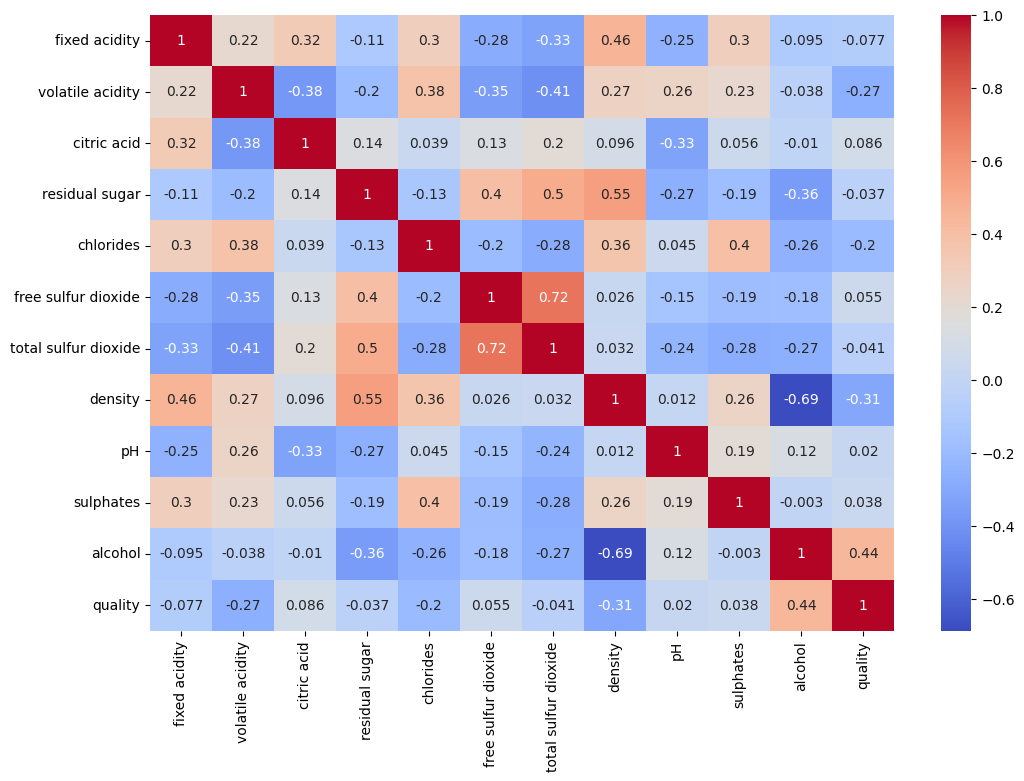

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = wine.drop(['quality', 'quality_category'], axis=1)
X = pd.get_dummies(X)  
y = wine['quality_category']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.8546153846153847

Classification Report:
               precision    recall  f1-score   support

        high       0.79      0.59      0.67       252
         low       0.83      0.10      0.18        49
      medium       0.87      0.96      0.91       999

    accuracy                           0.85      1300
   macro avg       0.83      0.55      0.59      1300
weighted avg       0.85      0.85      0.84      1300



In [6]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

svm_y_pred = svm_clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_classification_rep = classification_report(y_test, svm_y_pred, target_names=label_encoder.classes_)

svm_accuracy, svm_classification_rep


C:\Users\deanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7684615384615384,
 '              precision    recall  f1-score   support\n\n        high       0.00      0.00      0.00       252\n         low       0.00      0.00      0.00        49\n      medium       0.77      1.00      0.87       999\n\n    accuracy                           0.77      1300\n   macro avg       0.26      0.33      0.29      1300\nweighted avg       0.59      0.77      0.67      1300\n')

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier(random_state=42)
gbm_clf.fit(X_train, y_train)

gbm_y_pred = gbm_clf.predict(X_test)

gbm_accuracy = accuracy_score(y_test, gbm_y_pred)
gbm_classification_rep = classification_report(y_test, gbm_y_pred, target_names=label_encoder.classes_)

gbm_accuracy, gbm_classification_rep


(0.81,
 '              precision    recall  f1-score   support\n\n        high       0.68      0.40      0.50       252\n         low       0.50      0.10      0.17        49\n      medium       0.83      0.95      0.89       999\n\n    accuracy                           0.81      1300\n   macro avg       0.67      0.48      0.52      1300\nweighted avg       0.79      0.81      0.78      1300\n')

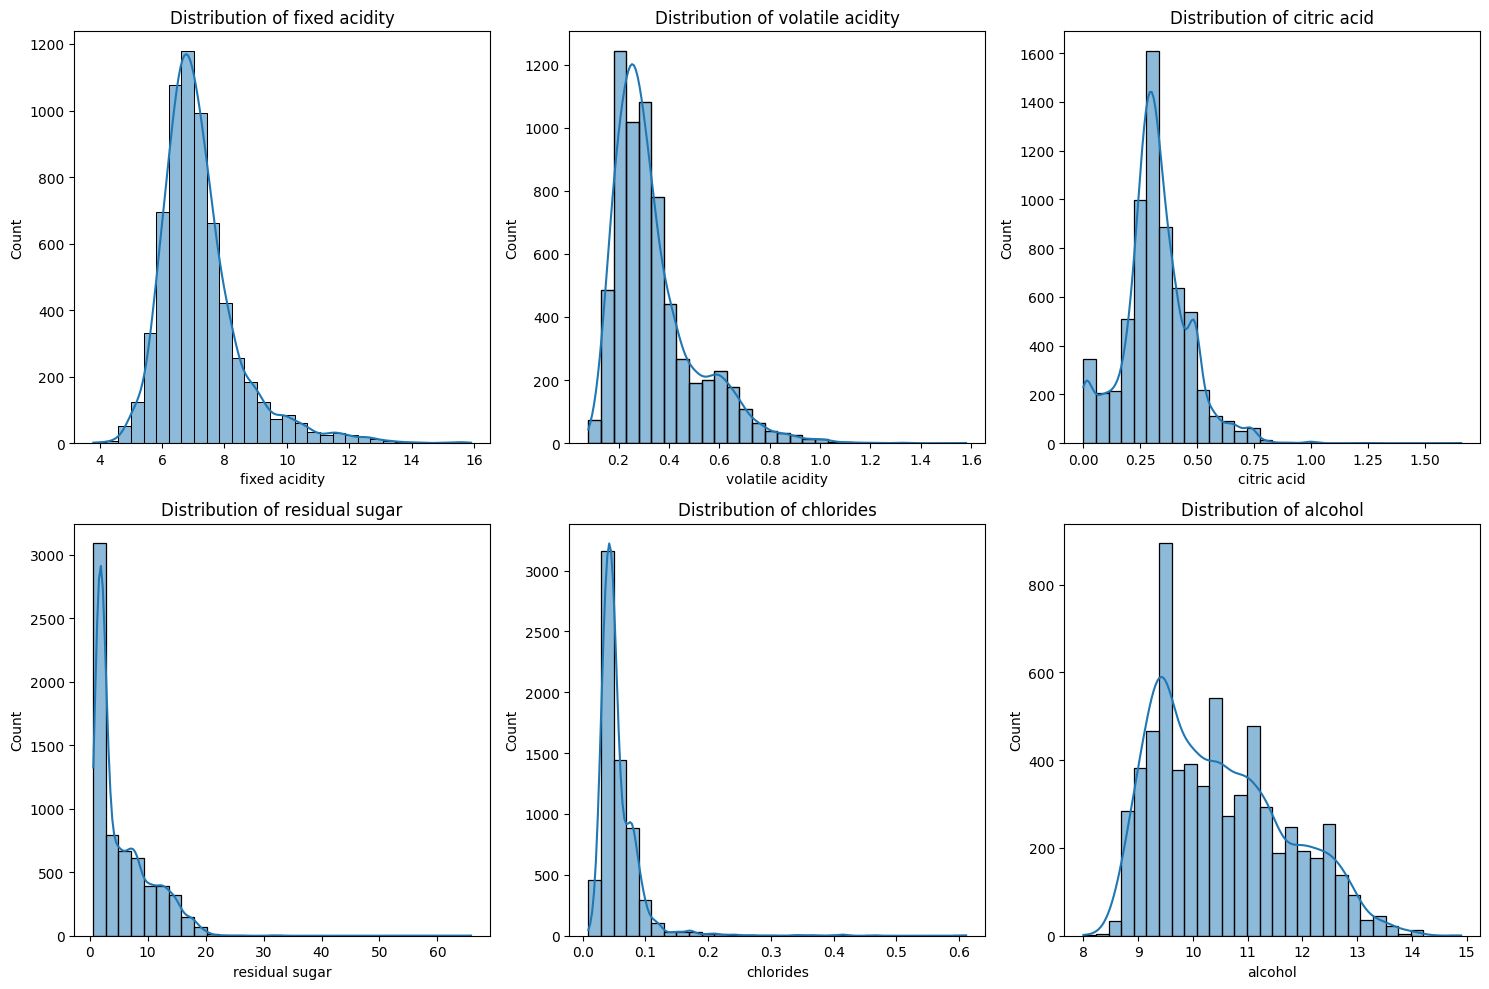

In [8]:
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'alcohol']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(wine[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


In [9]:
wine['fixed_acidity_bin'] = pd.qcut(wine['fixed acidity'], q=3, labels=['low', 'medium', 'high'])
wine['volatile_acidity_bin'] = pd.qcut(wine['volatile acidity'], q=3, labels=['low', 'medium', 'high'])
wine['citric_acid_bin'] = pd.qcut(wine['citric acid'], q=3, labels=['low', 'medium', 'high'])
wine['residual_sugar_bin'] = pd.qcut(wine['residual sugar'], q=3, labels=['low', 'medium', 'high'])
wine['chlorides_bin'] = pd.qcut(wine['chlorides'], q=3, labels=['low', 'medium', 'high'])
wine['alcohol_bin'] = pd.qcut(wine['alcohol'], q=3, labels=['low', 'medium', 'high'])
wine['fixed_acidity_citric_acid'] = wine['fixed acidity'] * wine['citric acid']
wine['volatile_acidity_chlorides'] = wine['volatile acidity'] * wine['chlorides']
wine['fixed_acidity_squared'] = wine['fixed acidity'] ** 2
wine['volatile_acidity_squared'] = wine['volatile acidity'] ** 2

wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,fixed_acidity_bin,volatile_acidity_bin,citric_acid_bin,residual_sugar_bin,chlorides_bin,alcohol_bin,fixed_acidity_citric_acid,volatile_acidity_chlorides,fixed_acidity_squared,volatile_acidity_squared
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,medium,high,low,low,high,low,0.000,0.05320,54.76,0.4900
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,high,high,low,medium,high,medium,0.000,0.08624,60.84,0.7744
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,high,high,low,medium,high,medium,0.312,0.06992,60.84,0.5776
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,high,medium,high,low,high,medium,6.272,0.02100,125.44,0.0784
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,medium,high,low,low,high,low,0.000,0.05320,54.76,0.4900


In [10]:
wine_low = wine[wine['quality_category'] == 'low']
wine_medium = wine[wine['quality_category'] == 'medium']
wine_high = wine[wine['quality_category'] == 'high']

wine_low_oversampled = wine_low.sample(len(wine_medium), replace=True, random_state=42)

wine_oversampled = pd.concat([wine_low_oversampled, wine_medium, wine_high])

X_oversampled = wine_oversampled.drop(['quality', 'quality_category'], axis=1)
X_oversampled = pd.get_dummies(X_oversampled)

y_oversampled = label_encoder.transform(wine_oversampled['quality_category'])

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

rf_over = RandomForestClassifier(random_state=42)
rf_over.fit(X_train_over, y_train_over)

rf_y_pred_over = rf_over.predict(X_test_over)

rf_accuracy_over = accuracy_score(y_test_over, rf_y_pred_over)
rf_classification_rep_over = classification_report(y_test_over, rf_y_pred_over, target_names=label_encoder.classes_)

gbm_over = GradientBoostingClassifier(random_state=42)
gbm_over.fit(X_train_over, y_train_over)

gbm_y_pred_over = gbm_over.predict(X_test_over)

gbm_accuracy_over = accuracy_score(y_test_over, gbm_y_pred_over)
gbm_classification_rep_over = classification_report(y_test_over, gbm_y_pred_over, target_names=label_encoder.classes_)

rf_accuracy_over, rf_classification_rep_over, gbm_accuracy_over, gbm_classification_rep_over


(0.9389755011135857,
 '              precision    recall  f1-score   support\n\n        high       0.83      0.57      0.68       246\n         low       1.00      1.00      1.00      1035\n      medium       0.90      0.97      0.93       964\n\n    accuracy                           0.94      2245\n   macro avg       0.91      0.85      0.87      2245\nweighted avg       0.94      0.94      0.93      2245\n',
 0.84543429844098,
 '              precision    recall  f1-score   support\n\n        high       0.67      0.46      0.54       246\n         low       0.89      0.95      0.92      1035\n      medium       0.82      0.83      0.83       964\n\n    accuracy                           0.85      2245\n   macro avg       0.80      0.75      0.76      2245\nweighted avg       0.84      0.85      0.84      2245\n')

Accuracy for random forest: 94%